#### Percolation

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate2d

# make a directory for figures

!mkdir figures
from os.path import basename, exists
def download(url):
    fileName = basename(url)
    if not exists(fileName):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, fileName)
        print(f'Downloaded {local}')

download('https://github.com/wernadsky/test/raw/master/cell2d.py')
download('https://github.com/wernadsky/test/raw/master/utils.py')

from cell2d import Cell2D, draw_array, add_island, multi_frame, three_frame

A subdirectory or file figures already exists.


In [2]:
class Percolation(Cell2D):
    def __init__(self, n, m=None, p=.5):

        if m is None:
            m = n
        self.p = p      # вероятность того, что клетка будет порой
        self.array = np.random.choice([0, 1], (n, m), p=[p, 1-p])
        # матрица nxm случайно распределенных значений 0 и 1
        # в соответствии с вероятностью p 
        self.array[0] = 5   # верхний ряд (мокрые клетки)

    kernel = np.array([ [0, 1, 0],      # на каждом шаге необходимо определять
                        [1, 0, 1],      # имеются ли у поры мокрые клетки
                        [0, 1, 0] ])    # по соседству Неймана

    def step(self):
        a = self.array
        c = correlate2d(a, self.kernel, mode='same', boundary='fill')
        self.array[(a==1) & (c>=5)] = 5

    def num_wet(self):
        """Total number of wet cells."""
        return np.sum(self.array == 5)
    
    def bottom_row_wet(self):
        """Number of wet cells in the bottom row."""
        return np.sum(self.array[-1] == 5)

    def draw(self, size=None):
        """Draws the cells."""
        draw_array(self.array, size, cmap='Blues', vmax=5)

    def test_perc(self, mode='first'):
        """ запуск процесса перколяции; повторяет step, до тех пор пока жидкость
        пока не остановится или (при mode='first') пока не дойдет до дна.
        Возвращает True, если жидкость доходит до дна (т.е. существует кластер), иначе False
        """
        if mode=='first':
            first = True
        elif mode=='full':
            first = False
        else:
            raise ValueError('argument mode must be "fist" of "full"')

        num_wet = self.num_wet()
        while True:
            self.step()

            if self.bottom_row_wet() and first:
                return True

            new_num_wet = self.num_wet()
            if new_num_wet == num_wet:
                return bool(self.bottom_row_wet())
            
            num_wet = new_num_wet

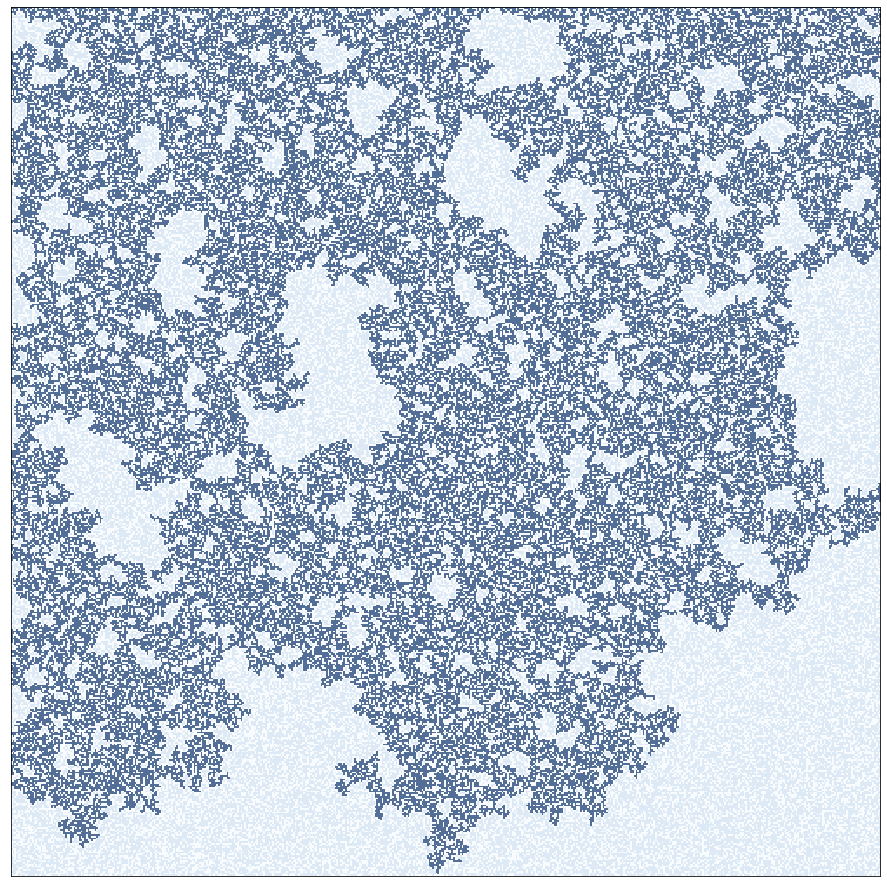

In [ ]:
perc = Percolation(500, p=0.4)
fig = perc.animate(frames=1500, size=16, interval=0.01, iters=1)
fig.savefig('images/percolation')